A imersão irá tratar sobre predição de valores de casas em São Paulo

### Aula 1


In [1]:
import pandas as pd

houses = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
houses.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
# desafio 1: Realizar a média da metragem para cada um dos bairros

houses.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [3]:
# desafio 2: Pegar outras estatísticas dos dados (como média, mediana, min, max)

houses['Metragem'].agg([pd.DataFrame.mean, pd.DataFrame.median, min, max])

mean         442.300659
median       290.000000
min           10.000000
max       750000.000000
Name: Metragem, dtype: float64

In [4]:
# desafio 3: Descobrir quais são os bairros que não tem nome de rua

null_streets = houses['Rua'].isna()
houses[null_streets]['Bairro'].unique()

array(['Jardim Morumbi', 'Jardim Luzitânia', 'Parque da Lapa',
       'Chácara Santo Antônio (Zona Sul)', 'Jardim Guedala',
       'Vila Arriete', 'Alto de Pinheiros', 'Planalto Paulista',
       'Vila Moinho Velho', 'Brooklin Paulista', 'Sumaré',
       'Jardim Paulista', 'Vila Gustavo', 'Jardim Trussardi',
       'Vila Madalena', 'Jardim dos Estados', 'Vila Santos',
       'Jardim Europa', 'Butantã', 'Jardim Paulistano',
       'Jardim Petrópolis', 'Vila Mariana', 'Vila Aparecida', 'Siciliano',
       'Alto da Lapa', 'Jardim da Glória', 'Morumbi', 'Vila Ida',
       'Cidade Jardim', 'Cidade Dutra', 'Água Fria', 'Parque Boturussu',
       'Belenzinho', 'Vila Sônia', 'Jardim Panorama', 'Jardim Ampliação',
       'Lauzane Paulista', 'Vila Sabrina', 'Vila Olímpia',
       'Jardim Franca', 'Jardim Sílvia (Zona Oeste)', 'Santo Amaro',
       'Mooca', 'Jardim América', 'Interlagos', 'Pacaembu',
       'Jardim Santo Amaro', 'Vila Matilde', 'Vila Prudente',
       'Vila Nova Conceição', 'Jard

### Aula 2


In [5]:
# iniciando alteração para a coluna valor para ser um float
splited_column = houses['Valor'].str.split(expand=True)


In [6]:
# existem diferentes tipos de imóveis, com venda e alugel
splited_column[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [7]:
# assim pegamos apenas os com venda 
houses = houses[splited_column[2].isnull()]
houses

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000


In [8]:
# removendo os pontos da string e convertendo para float
values_without_dots = houses['Valor'].str.split(expand=True)[1].str.replace('.', '')
houses["Valor"] = values_without_dots.astype(float)
houses.head()

/tmp/ipykernel_4177/3623410304.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  values_without_dots = houses['Valor'].str.split(expand=True)[1].str.replace('.', '')


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0


In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6107 non-null   object 
 1   Bairro     9146 non-null   object 
 2   Cidade     9156 non-null   object 
 3   Metragem   9156 non-null   int64  
 4   Quartos    9156 non-null   int64  
 5   Banheiros  9156 non-null   int64  
 6   Vagas      9156 non-null   int64  
 7   Valor      9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


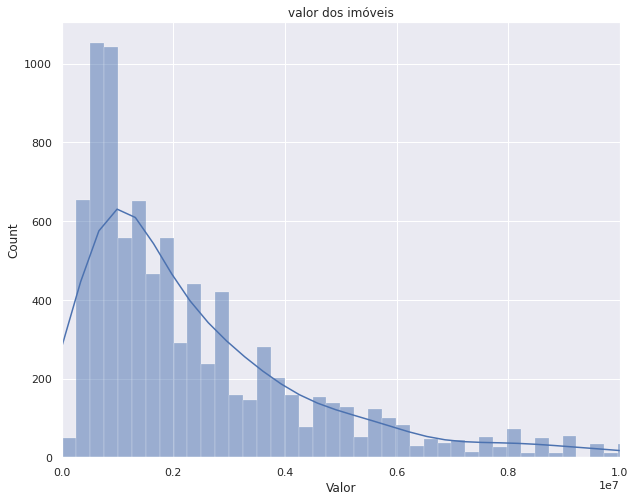

In [56]:
# plotando gráfico com seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# setando as configurações padrões do seaborn
sns.set()

# aumentando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# plotando o gráfico
ax = sns.histplot(data = houses, x = 'Valor', kde=True)

# adicionando um título
ax.set_title("valor dos imóveis")

# limitando a visualização do gráfico
plt.xlim(-50, 10000000)

# exibindo o gráfico
plt.show()


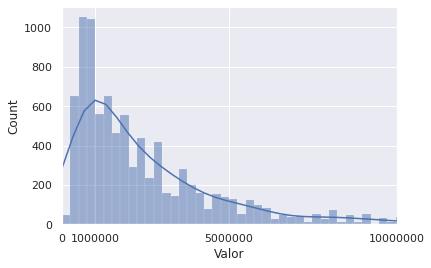

In [38]:
# desafio 1: Criar uma escala de valores em milhões.
ax = sns.histplot(data = houses, x = 'Valor', kde=True)
plt.xlim(-50, 10000000)
ax.set_xticks([0, 1000000, 5000000, 10000000], labels=['0', '1000000', '5000000', '10000000'])
plt.show()



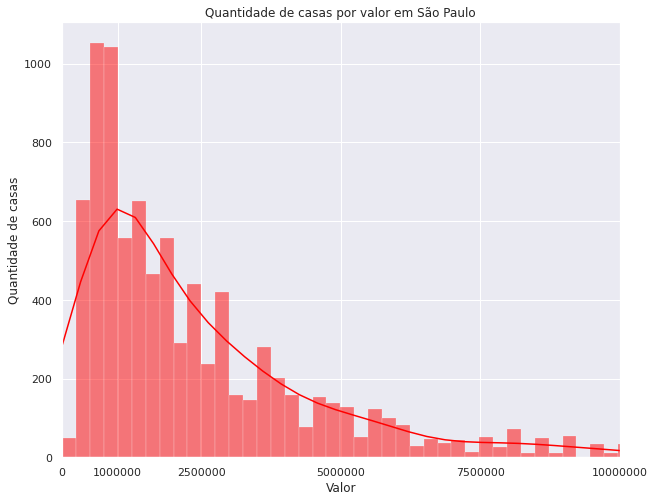

In [63]:
# desafio 2: Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = houses, x = 'Valor', kde=True, color='red')
plt.xlim(-50, 10000000)

# título
ax.set_title('Quantidade de casas por valor em São Paulo')

# alterando os labels
ax.set_ylabel('Quantidade de casas')

# alterando a escala de X
ax.set_xticks(
    [0, 1000000, 2500000, 5000000, 7500000, 10000000], 
    labels=['0', '1000000', '2500000', '5000000', '7500000', '10000000']
)

plt.show()

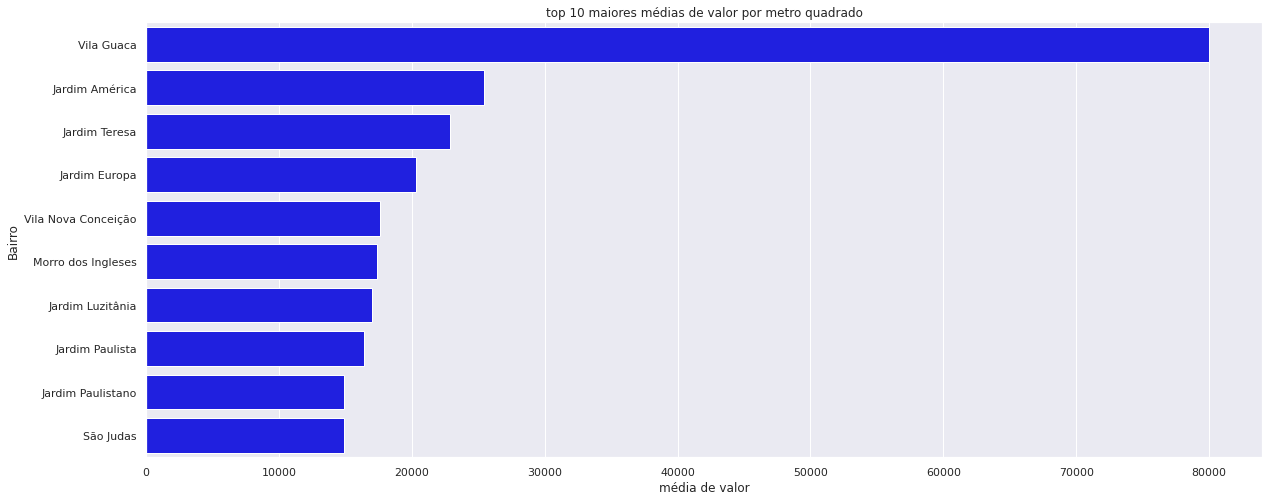

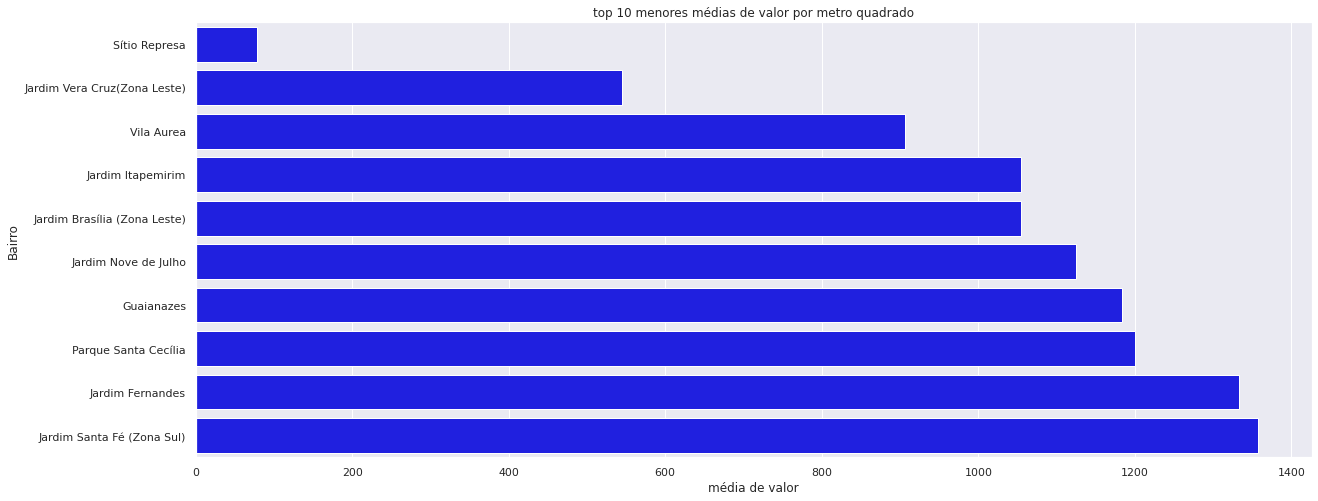

In [105]:
# desafio 3: Preço do metro quadrado por bairro e plotar em um gráfico ideal.

def calcular_valor_por_metro(df):
    media_metros = df['Metragem'].mean()
    media_preco = df['Valor'].mean()
    return media_preco/media_metros

preco_por_metro = houses.groupby('Bairro').apply(calcular_valor_por_metro)


# 10 maiores médias
plt.figure(figsize=(20, 8))
dez_maiores_medias = preco_por_metro.sort_values(ascending=False)[:10]
graph = sns.barplot(
    x = dez_maiores_medias.values, 
    y = dez_maiores_medias.index, 
    color='blue',
)
graph.set_title('top 10 maiores médias de valor por metro quadrado')
graph.set_xlabel('média de valor')

plt.show()

# 10 menores médias
plt.figure(figsize=(20, 8))
dez_menores_medias = preco_por_metro.sort_values(ascending=True)[:10]
graph = sns.barplot(x = dez_menores_medias.values, y = dez_menores_medias.index, color='blue')
graph.set_title('top 10 menores médias de valor por metro quadrado')
graph.set_xlabel('média de valor')

plt.show()


,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07
